In [2]:
import matplotlib.pyplot as plt
from matplotlib import colors

import numpy as np
import os
import pandas as pd



In [3]:
col_list = ['#ed392b', '#feb441', '#4090c5']
col_max = ['#af1117', '#ea6e13', '#0f59a3']
gene_list = ['tbxta', 'tbx16', 'tbx6']
emb_cmap = ['Reds', 'YlOrBr', 'Blues']
large_colours = ['#692606', '#8e3104', '#08326e']
gene_codes = ['g1', 'g2', 'g3']

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lato', 'Tahoma', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

plt.rcParams['font.sans-serif'] = ['Lato']

plt.rcParams['font.size'] = 10


In [3]:
# all_files = os.listdir('../output/final_t_samples')
# all_files = [i for i in all_files if '40000' in i or 'restart' in i]

# notconv = np.loadtxt('../not_converged.txt', dtype = str)
# converged_samples = np.loadtxt('../converged.txt', dtype=str)

# all_samples = []

# nwalkers = []
# nAgets = []
# random_num = []
# techrep = []
# logprob = []
# fnames = []

# acceptance_threshold = 0.15

# for f in all_files:
#     samples = np.loadtxt(f'../output/final_t_samples/{f}')
#     if samples.shape == (2000, 24):
#         # acceptance = np.load(f'../output/acceptance_fraction_{f[8:-25]}',allow_pickle= True)
#         samp = samples.reshape(-1, 24)
#         # samp = samp[acceptance > acceptance_threshold]
#         all_samples.append(samp)
#         nwalkers.append(200)
#         info = f.split('run')[1]
#         nAgets.append(info.split('_')[0])
#         random_num.append(info.split('_')[1].split('.')[1])
#         techrep.append(info.split('_')[4].split('.')[-1])
#         fnames.append([f + str(i) for i in range(len(samp))])




# fit_info = pd.DataFrame(
#     {'nWalkers': np.repeat(nwalkers, 2000),
#      'nAgets': np.repeat(nAgets, 2000),
#      'random_num': np.repeat(random_num, 2000),
#      'techrep': np.repeat(techrep, 2000),
#      'fname': np.array(fnames).flatten()
#     }
# )

# flat_samples  = [np.array(i).reshape(-1, 24) for i in all_samples]
# flat_samples = pd.DataFrame(np.array([i.reshape(-1, 24) for i in flat_samples if i.shape[0] > 0]).reshape(-1, 24))

# flat_samples['fname'] = fit_info['fname']
# flat_samples['nAgets'] = fit_info['nAgets']

In [4]:

# # # define the maximum / sigma values for the priors
# sane_values = [10, 10, 50, 10] + [50 for i in range(5)] + \
#             [200 for i in range(6)] + \
#             [50 for i in range(6)] + \
#             [200 for i in range(3)]



# dat = []

# files = os.listdir('../output/simulations/')
# files = [i for i in files if 'simulation' in i]
# files = [i for i in files if 'perturbed_signalling' not in i]


# for f in files:
#     data = pd.read_csv('../output/simulations/' + f)
#     dat.append(data)

# data = pd.concat(dat)
# data.columns = ['blah', 'fname', 'fit1', 'fit2', 'll']

In [5]:
# params_and_data = pd.merge(left = flat_samples, right = data, on='fname')
# param_names = range(24)

# print(params_and_data.shape)

# params_and_data = params_and_data[
#     (params_and_data.iloc[:, :len(sane_values)].abs() <= sane_values).all(axis=1)
# ]


# ##
# # filtereing
# #####


# params_and_data = params_and_data[params_and_data['ll'] > -1000000]


# params_and_data = params_and_data[params_and_data['nAgets'].astype(int) == 200]

# params_and_data['short_fname'] = [i[:-27] for i in params_and_data['fname']]
# params_and_data = params_and_data[params_and_data['short_fname'].isin(converged_samples)]

# print(params_and_data.shape)

# params_and_data = params_and_data[params_and_data['ll'] > -150000]



(360000, 30)
(3607, 31)


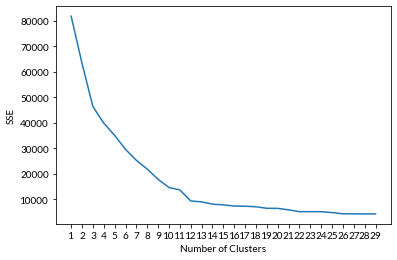

In [7]:
# # elbow plot to choose n cluters


# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler


# kmeans_kwargs = {
# "init": "random",
# "n_init": 10,
# "random_state": 1,
# }

# #create list to hold SSE values for each k


# sc = StandardScaler()


# X = sc.fit_transform(params_and_data[range(24)])


# maxClust = 30
# sse = []
# for k in range(1, maxClust):
#     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#     kmeans.fit(X)
#     sse.append(kmeans.inertia_)

# #visualize results
# plt.plot(range(1, maxClust), sse)
# plt.xticks(range(1, maxClust))
# plt.xlabel("Number of Clusters")
# plt.ylabel("SSE")
# plt.show()

In [8]:


# kmeans = KMeans(n_clusters=13, **kmeans_kwargs).fit(X)
# labels = kmeans.labels_

# params_and_data['lab'] = labels

# clust, counts = np.unique(params_and_data['lab'], return_counts=True)

# size_thresh = 34*5 #5% of parameters

# big_clusters = clust[counts > size_thresh]
# small_clusters = clust[counts <= size_thresh]

# params_and_data.loc[params_and_data['lab'].isin(small_clusters), 'lab'] = np.nan

In [9]:
# # Sort clusters based on size
# cluster_sizes = dict(zip(clust, counts))
# sorted_clusters = sorted(cluster_sizes, key=cluster_sizes.get, reverse=True)

# # Assign cluster numbers
# cluster_mapping = {cluster: i for i, cluster in enumerate(sorted_clusters)}
# params_and_data['cluster'] = params_and_data['lab'].map(cluster_mapping)

# # Display the modified DataFrame
# # params_and_data

In [11]:
# median_nets = params_and_data.groupby('cluster').median()

# median_nets = median_nets.sort_values(by = 'll', ascending = False)

# median_nets.to_csv('../median_networks_for_clusters.csv')

In [13]:
params_and_data = pd.read_csv('param_sets/all_networks.csv')
median_nets = pd.read_csv('../median_networks_for_clusters.csv')

In [10]:
import matplotlib.cm
accent = matplotlib.cm.datad["Accent"]['listed']

[0.30425462 0.27987952 0.12161531 0.07870187 0.06617134]


c:\Users\shil5659\Anaconda3\envs\AGET\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


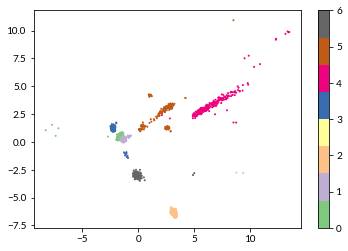

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


sc = StandardScaler()

param_names = range(24)

params_and_data_cp = params_and_data.dropna()
params_and_data_cp['cmap'] = [accent[int(i)] for i in params_and_data_cp['cluster']]

scaled_samples = sc.fit_transform(params_and_data_cp.iloc[:, 0:24])

pca = PCA(n_components=5)
pca_out = pca.fit_transform(scaled_samples)
print(pca.explained_variance_ratio_)

plt.scatter(
        pca_out[:, 0], pca_out[:, 1],
        c = params_and_data_cp['cluster'],
        s = 1, alpha = 1,
        # norm = centered_at_zero,
        cmap = 'Accent'
        )

plt.colorbar()


In [13]:
params_and_data_cp.sort_values(by = 'll', ascending = False).iloc[0, 0:24].to_csv('../MAP_params.csv')

In [14]:
param_names = [
    'tbxta-tbxta', 'tbx16-tbxta', 'tbx6-tbxta',
    'tbxta-tbx16', 'tbx16-tbx16', 'tbx6-tbx16',
    'tbxta-tbx6', 'tbx16-tbx6', 'tbx6-tbx6',
    'tbxta production', 'tbx16 production', 'tbx6 production',
    'tbxta degradation', 'tbx16 degradation', 'tbx6 degradation',
    'FGF-tbx16', 'FGF-tbx6', 'FGF-tbxta', 'Wnt-tbxta', 'Wnt-tbx16', 'Wnt-tbx6',
    'basal tbxta', 'basal tbx16', 'basal tbx6'
    ]
grn_idx = [i for i in range(9)] + [i for i in range(15,21)]
not_grn_idx = [i for i in range(24) if i not in grn_idx]


c:\Users\shil5659\Anaconda3\envs\AGET\lib\site-packages\ipykernel_launcher.py:74: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("coolwarm_r").copy()
c:\Users\shil5659\Anaconda3\envs\AGET\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Use the colorbar set_ticks() method instead.
  import sys


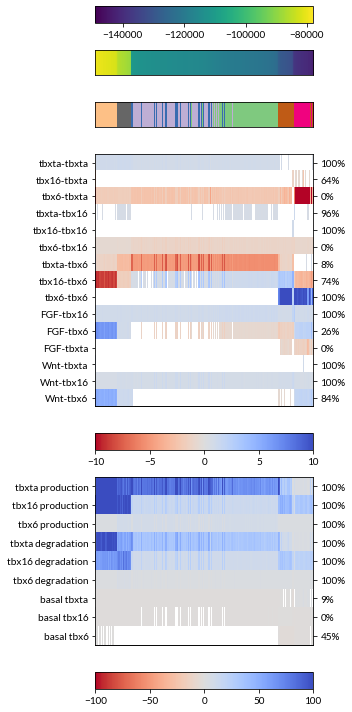

In [15]:
params_and_data = params_and_data_cp


def modify_cbar(axs):
    # axs.tick_params(direction='in')
    # axs.tick_params(axis="x", pad=-10)
    axs.set_yticks([])

grn_percentages = {}

n_entry = params_and_data.shape[0]

for i, index_of_interaction in enumerate(grn_idx):
    perc = params_and_data[params_and_data[index_of_interaction] > 0].shape[0]/n_entry * 100
    # print(round(perc))
    grn_percentages[i] = f'{round(perc)}%'

not_grn_percentages = {}

for i, index_of_interaction in enumerate(not_grn_idx):
    perc = params_and_data[params_and_data[index_of_interaction] > 0].shape[0]/n_entry * 100
    # print(round(perc))
    not_grn_percentages[i] = f'{round(perc)}%'


def map_secondary_axis(mapping, ax2):

    # Set the ticks and labels for the secondary y-axis
    ticks_secondary = list(mapping.keys())
    labels_secondary = [mapping[tick] for tick in ticks_secondary]
    ax2.set_yticks(ticks_secondary)
    ax2.set_yticklabels(labels_secondary)
    ax2.set_xticks([])



ll = params_and_data.sort_values('ll', ascending = False)['ll']

X_sorted = np.array(params_and_data.sort_values('ll', ascending = False)[range(24)])

fig, ax = plt.subplots(7,1,
                       figsize = (5, 10),
                       tight_layout = True,
                       gridspec_kw={'height_ratios': [0.2, 0.3, 0.3, 3, 0.2, 2, 0.2],
                       # 'hspace':0.2
                       },
                       )


im1 = ax[1].imshow(np.array([ll.values]), extent=[0, len(ll), 0, 1],
                  interpolation='none',
                  aspect='auto')

ax[1].set_xticks([])
ax[1].set_yticks([])

fig.colorbar(im1, cax=ax[0], orientation='horizontal')# .set_title('This is a title')  # Add your colorbar label



im2 = ax[2].imshow(np.array([list(params_and_data['cluster'])]), extent=[0, len(params_and_data['lab']), 0, 1], # aspect='auto'
                  interpolation='none',
                  cmap = 'Accent',
                  aspect='auto')



ax[2].set_xticks([])
ax[2].set_yticks([])


# Modify the 'coolwarm' colormap to assign grey color between -0.5 and 0.5
cmap_modified = plt.cm.get_cmap('coolwarm_r')
cmap_modified.set_bad('white')

X_sorted[abs(X_sorted) < .5] = np.nan

im3 = ax[3].imshow(X_sorted.T[grn_idx],
                  interpolation='none',
                  aspect='auto', cmap=cmap_modified,
                  vmin=-10, vmax=10)

grn_names = np.array(param_names)[grn_idx]
not_grn_names = np.array(param_names)[not_grn_idx]

ax[3].set_yticks(range(len(grn_names)))
ax[3].set_yticklabels(grn_names)
ax[3].set_xticks([])


ax2 = ax[3].twinx()
ax2.imshow(X_sorted.T[grn_idx],
                  interpolation='none',
                  aspect='auto', cmap=cmap_modified,
                  vmin=-10, vmax=10)


map_secondary_axis(grn_percentages, ax2)

fig.colorbar(im3, cax=ax[4], orientation='horizontal')  # Add your colorbar label


im4 = ax[5].imshow(X_sorted.T[not_grn_idx],
                  interpolation='none',
                  aspect='auto',
                  cmap=cmap_modified,
                  vmin=-100, vmax=100)


ax3 = ax[5].twinx()
ax3.imshow(X_sorted.T[not_grn_idx],
                  interpolation='none',
                  aspect='auto', cmap=cmap_modified,
                  vmin=-100, vmax=100)


map_secondary_axis(not_grn_percentages, ax3)

ax[5].set_yticks(range(len(not_grn_names)))
ax[5].set_yticklabels(not_grn_names)
ax[5].set_xticks([])

fig.colorbar(im4, cax=ax[6], orientation='horizontal')# .set_title('This is a title')  # Add your colorbar label

# plt.savefig('../graphs/param_value_histogram.png', dpi = 600)

modify_cbar(ax[0])
modify_cbar(ax[4])
modify_cbar(ax[6])

plt.show()


In [16]:
# now we can simulate median networks



col_list = ['#ed392b', '#feb441', '#4090c5']
col_max = ['#af1117', '#ea6e13', '#0f59a3']
gene_list = ['tbxta', 'tbx16', 'tbx6']
emb_cmap = ['Reds', 'YlOrBr', 'Blues']
large_colours = ['#692606', '#8e3104', '#08326e']
gene_codes = ['g1', 'g2', 'g3']

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lato', 'Tahoma', 'DejaVu Sans',
                               'Lucida Grande', 'Verdana']

plt.rcParams['font.sans-serif'] = ['Lato']

plt.rcParams['font.size'] = 10


In [5]:
from cProfile import run
import numpy as np

import liveModelling
import liveModelling.simulate as simulate
from liveModelling import mcmc_functions as mcmc_functions

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib import colors
from scipy.ndimage.filters import uniform_filter1d
import matplotlib.ticker as ticker

import pickle

def PSH(s, t, wnt, fgf, params):

    B = np.array([wnt, fgf])

    W = np.array([[params[0] , params[1], params[2]],\
                 [ params[3],  params[4], params[5]],\
                 [ params[6],  params[7], params[8]]])

    E = np.array([[params[18],params[17]],[params[19],params[15]],[params[20],params[16]]])
    R = [params[9],  params[10],  params[11]]
    lmd = [params[12],  params[13] , params[14]]
    h = [params[21],  params[22] , params[23]]


    u0 = W[0][0]*s[0] + W[0][1]*s[1] + W[0][2]*s[2] + E[0].dot(B) + h[0]
    u1 = W[1][0]*s[0] + W[1][1]*s[1] + W[1][2]*s[2] + E[1].dot(B) + h[1]
    u2 = W[2][0]*s[0] + W[2][1]*s[1] + W[2][2]*s[2] + E[2].dot(B) + h[2]

    d_tbxta_dt = R[0] * g(u0)  - lmd[0]* s[0]
    d_tbx16_dt = R[1] * g(u1)  - lmd[1]* s[1]
    d_tbx24_dt = R[2] * g(u2)  - lmd[2]* s[2]

    dsdt = [d_tbxta_dt, d_tbx16_dt, d_tbx24_dt]

    return dsdt


def g(x):
    return 0.5 * ((x / np.sqrt(x ** 2 + 1)) + 1)

class Simulate_on_tracks:
    '''
    The simulator takes as input a set of 24 parameters describing the GRN
    and uses ODEs with the initial and boundary conditions from the AGETs to
    simulate gene expression for the chosen 10 AGETs. The simulated gene expression
    is then added to the AGET, so that the AGET includes the original target as well
    as the simulated gene expression.
    '''

    def __init__(self, parameters, list_of_tracks, static = False):
        self.params = parameters
        self.list_of_tracks = list_of_tracks
        self.static = static

    def simulation(self):
        params = self.params
        tracks_df = self.list_of_tracks

        # precompute t_intervals to speed up function
        base_t_intervals = []
        for i in range(1, 61): # number of timepoints
            t_interval = np.linspace(i*90/3600/3, (i+1)*90/3600/3, 10)
            base_t_intervals.append(t_interval)

        # precompute the Time_nPSM
        time_npsm = [i*90/3600/3 for i in range(1, 62)]


        # add the params to an empty array of shape (26) to pass to PSH_lsoda
        params_to_pass = np.empty((26, ))
        params_to_pass[0:24] = params

        df_out = []
        # Iterate through celltracks (AGETs)
        for df_celltrack in tracks_df:
            # add biological time for the ODEs
            # I precomputed this earlier to speed up the iterations
            df_celltrack = df_celltrack.reset_index(drop = True)
            if df_celltrack.shape[0] == 61:
                df_celltrack['Time_nPSM'] = time_npsm
            else:
                df_celltrack['Time_nPSM'] = df_celltrack['Time']*90/3600/3


            if (df_celltrack.shape[0]==0):
                continue

            # collect parameters / ICs
            simulated_expression = [df_celltrack.loc[0, ['g1', 'g2', 'g3']].values]
            B1 = df_celltrack['Wnt'].values
            B2 = df_celltrack['FGF'].values
            Time_nPSM = df_celltrack['Time_nPSM'].values
            time = df_celltrack['Time'].values

            # loop through positions in dataframe
            for index in df_celltrack.index[:-1]:
                # if the timestep = 1,
                # we can use the precomputed information above
                count_timesteps_between = time[index+1] - time[index]
                if count_timesteps_between != 1:
                    t_interval = np.linspace(Time_nPSM[index], Time_nPSM[index+1], 10*int(count_timesteps_between))
                else:
                    t_interval = base_t_intervals[int(time[index])-1]

                # define initial conditions
                # and signalling
                s0 = simulated_expression[-1]
                if self.static:
                    params_to_pass[24:26] =  [B1[0], B2[0]]
                else:
                    params_to_pass[24:26] =  [B1[index], B2[index]]
                    #print( [B1[index], B2[index]])

                simulated_expression.append(simulate.solve_lsoda(
                    s0,
                    t_interval,
                    params_to_pass
                    )[-1]
                )

            simulated_expression = np.array(simulated_expression)
            df_celltrack['g1_sim'] = simulated_expression[:, 0]
            df_celltrack['g2_sim'] = simulated_expression[:, 1]
            df_celltrack['g3_sim'] = simulated_expression[:, 2]
            df_out.append(df_celltrack) # append AGET with the simulated expression to the output list

        return df_out


In [6]:
# params = np.load('runs/map_params_runrun_8_mod_aget.txt', allow_pickle=True)
import pickle
sim = pd.read_csv(f'../Input/network7_sim_data.csv')
sim_t1 = sim[sim['Time'] == 1]
min_x = min(sim_t1['X'])
max_x = max(sim_t1['X'])

sim_t1['x_norm'] = (sim_t1['X'] - min_x) / (max_x - min_x)
data_subset = sim_t1[sim_t1['x_norm'] < 0.2]
data_subset = data_subset.reset_index(drop = True)


with open("../Input/List_of_all_cell_tracks_starttoend.txt", "rb") as fp:
    list_of_cell_tracks = pickle.load(fp) # Load the chosen AGETs#





c:\Users\shil5659\Anaconda3\envs\AGET\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
import matplotlib.cm
accent = matplotlib.cm.datad["Accent"]['listed']

In [8]:
median_nets = pd.read_csv('../median_networks_for_clusters.csv')


In [13]:
fig, axs_ = plt.subplots(median_nets.shape[0], 2,
                        sharex = True,
                        sharey = True,
                        tight_layout = True, figsize = (4, 8),
                        # gridspec_kw={'height_ratios': [1, 0.2]}
                        )



sim = pd.read_csv('../Input/network7_sim_data.csv')
# sim = pd.read_csv('../output/simulations/Sim_samples_run200_AGETs.15_randomnumber.10000_it.200_walkers.1_technicalreplicate.txt_final_timepoint_samp.txt0')
files = os.listdir('../output')

idx = 0

from matplotlib.colors import to_rgba
from itertools import cycle

dark2_colors = plt.cm.Accent.colors
color_cycle = cycle(dark2_colors)

for _, param_index in median_nets.iterrows():
    print(idx)

    params = param_index[1:25]

    axs = axs_[idx]

    sim = pd.concat(Simulate_on_tracks(params, list_of_cell_tracks).simulation())

    for i, timepoint in enumerate([30, 60]):
        sim_subset = sim[sim['Time'] == timepoint]

        for k in range(3):
            # ax.plot(sim_subset['Time'], sim_subset[gene_codes[j]], c = col_max[j], linewidth = 1)
            ax = axs[i]
            ax.scatter(
                sim_subset['X'], sim_subset[gene_codes[k] + '_sim'],
                c = col_list[k], s = 1)#, label = gene_list[k])


            yhat_1 = uniform_filter1d(
                sim_subset.sort_values("X")[f'g{k+1}'], size = 75, mode = 'nearest')
            yhat_2 = uniform_filter1d(
                sim_subset.sort_values("X")[f'g{k+1}_sim'], size = 75, mode = 'nearest')
            ax.plot(sim_subset.sort_values("X")['X'],
                        yhat_2, color = col_max[k],
                        label = f'{gene_list[k]} simulated')
            ax.plot(sim_subset.sort_values("X")['X'],
                        yhat_1, color = large_colours[k],
                        label = f'{gene_list[k]} target')


    axs[1].set_title(f'Cluster {idx+1}', color='black')
    idx+=1



for ax in axs_.flatten():
    ax.set_ylim(0, 1.5)
    ax.grid(True, linestyle='--', alpha=0.5, zorder= 0)
    # ax.axvline(0, alpha = 0.3, color='black', linewidth=1)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([0, 50, 100, 150, 200, 250])


for ax in axs_[:, 0]:
    ax.set_ylabel('Gene expr. (AU)')

axs_[0,0].set_title('t = 30')
axs_[0, 1].set_title('Cluster 1\nt = 60')
# axs_[0, 2].set_title('t = 60')


for ax in axs_[-1, :]:
    ax.set_xlabel('PA Position')


# plt.savefig('../graphs/Simulated patterns after clustering.png', dpi = 600)


In [10]:
def plot_tidy_histograms(flat_params, c):
    params = flat_params.T
    W1 = [params[0], params[1], params[2]]
    W2 = [params[3], params[4], params[5]]
    W3 = [params[6], params[7], params[8]]

    E1 = [params[18], params[17]]
    E2 = [params[19], params[15]]
    E3 = [params[20], params[16]]

    R = [params[9], params[10], params[11]]
    lmd = [params[12], params[13], params[14]]
    h = [params[21], params[22], params[23]]


    # plot the regulation first

    #genes
    for i in range(3):
        plot_pretty(W1[i], ax[i, 0], c)
        # ax[0, i].hist(W1[i], density = True)
        ax[i, 0].set_title(genes[i] + '-tbxta')
    for i in range(3):
        plot_pretty(W2[i], ax[i, 1], c)
        ax[i, 1].set_title(genes[i] + '-tbx16')
    for i in range(3):
        plot_pretty(W3[i], ax[i, 2], c)
        ax[i, 2].set_title(genes[i] + '-tbx6')


    #signalling
    for i in range(2):
        plot_pretty(E1[i], ax[i+3, 0], c)
        ax[i+3, 0].set_title(sig[i] + '-tbxta')
    for i in range(2):
        plot_pretty(E2[i], ax[i+3, 1], c)
        ax[i+3, 1].set_title(sig[i] + '-tbx16')
    for i in range(2):
        plot_pretty(E3[i], ax[i+3, 2], c)
        ax[i+3, 2].set_title(sig[i] + '-tbx6')

    # basal stuff
    for i in range(3):
        plot_pretty(R[i], ax[3+2, i], c)
        ax[3+2, i].set_title(genes[i] + ' promoter')
    for i in range(3):
        plot_pretty(lmd[i], ax[4+2, i], c)
        ax[4+2, i].set_title(genes[i] + ' degradation')
    for i in range(3):
        plot_pretty(h[i], ax[5+2, i], c)
        ax[5+2, i].set_title(genes[i] + ' basal activity')
    # for i in range(3):
    #     plot_pretty(R[i], ax[i, 3])
    #     ax[i, 3].set_title(genes[i] + ' promoter')

genes=['tbxta', 'tbx16', 'tbx6']
sig = ['FGF', 'Wnt']


from matplotlib.cm import get_cmap

name = "Dark2"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

def plot_pretty(data, axs, c):
    n, bins, _ = axs.hist(data, density = True, bins = 50, alpha = 0.3, color = c, label = lab)
    # axs.vlines(x = np.median(data), ymin = 0, color = 'red', ymax = np.max(n)*1.1)
    axs.set_axisbelow(True)
    axs.grid(True, linestyle='--', alpha=0.5, zorder= 0)
    axs.axvline(0, alpha = 0.3, color='black', linewidth=1)

    axs.spines['right'].set_visible(False)
    axs.spines['top'].set_visible(False)


NameError: name 'params_and_data_cp' is not defined

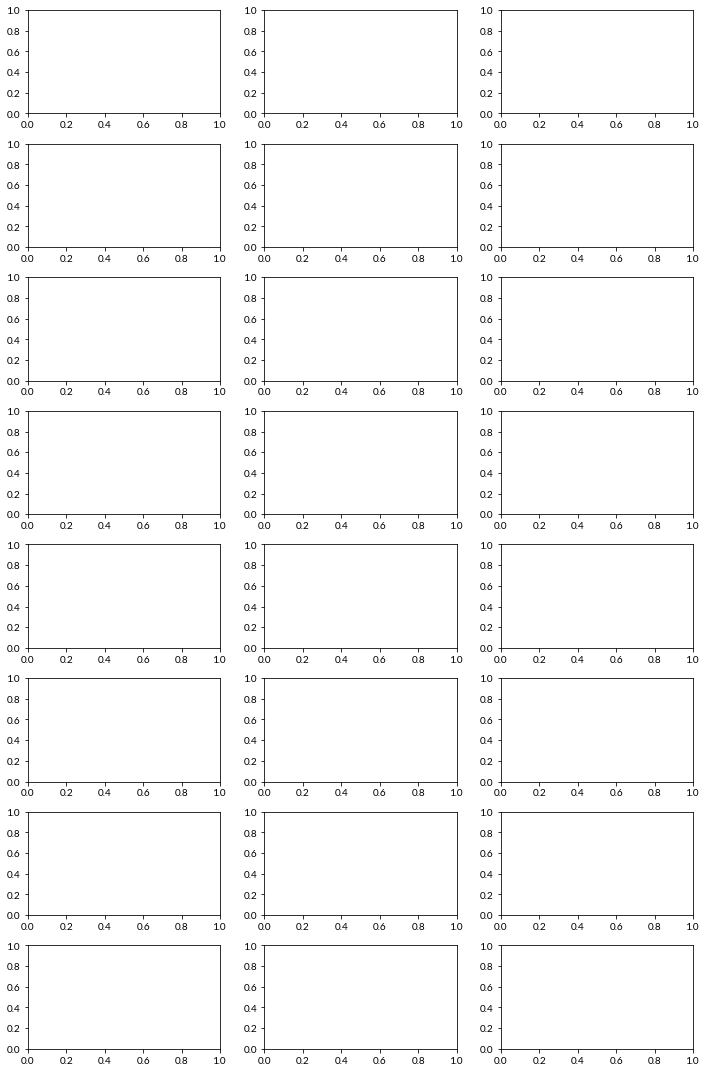

In [11]:
fig, ax = plt.subplots(
        8, 3,
        figsize = (10, 15), tight_layout = True)


toplot = params_and_data_cp
lab = ''
plot_tidy_histograms(np.array(toplot[[i for i in range(24)]]), c = 'black')



plt.savefig('../graphs/parameter values histogram AGETs used for clustering.png', dpi = 500)